## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
housing = pd.read_csv("Housing.csv")

In [4]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Inspect the various aspects of the housing dataframe

In [5]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

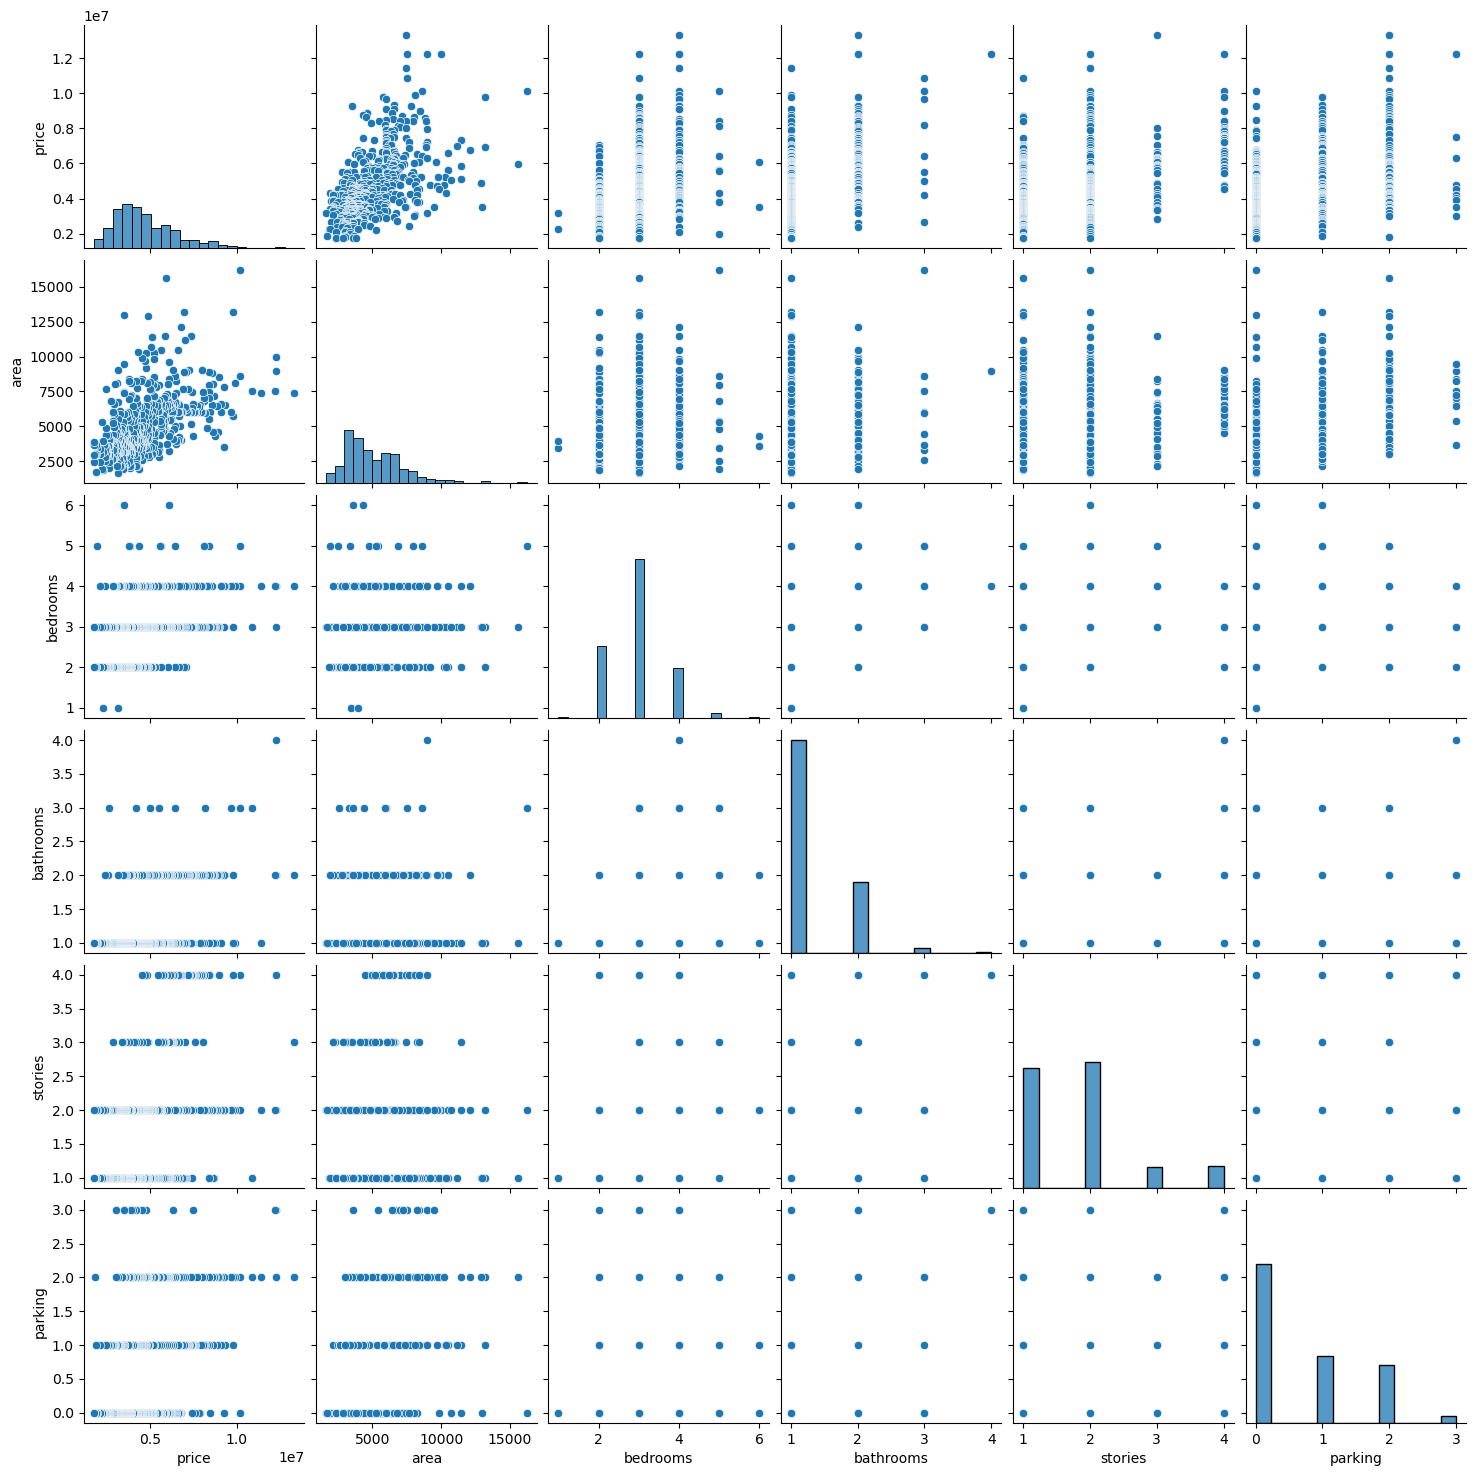

In [9]:
sns.pairplot(housing)
plt.show()

<Axes: >

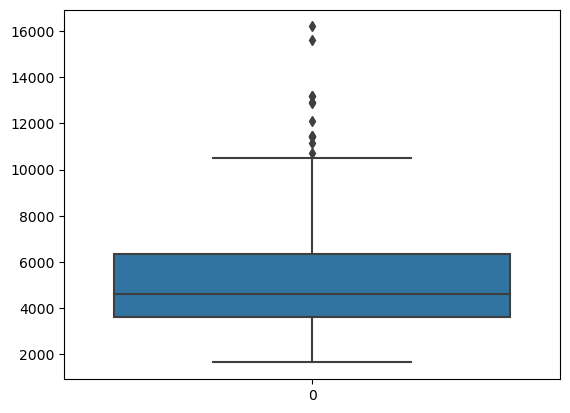

In [10]:
sns.boxplot(housing.area)

In [11]:
q1=housing.area.quantile(0.25)
q3=housing.area.quantile(0.75)
IQR= q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
upper=np.where(housing['area']>=UL)
upper

(array([  7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 186, 191,
        211, 403], dtype=int64),)

In [12]:
housing.drop(upper[0],inplace=True)

In [13]:
housing.shape

(530, 13)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

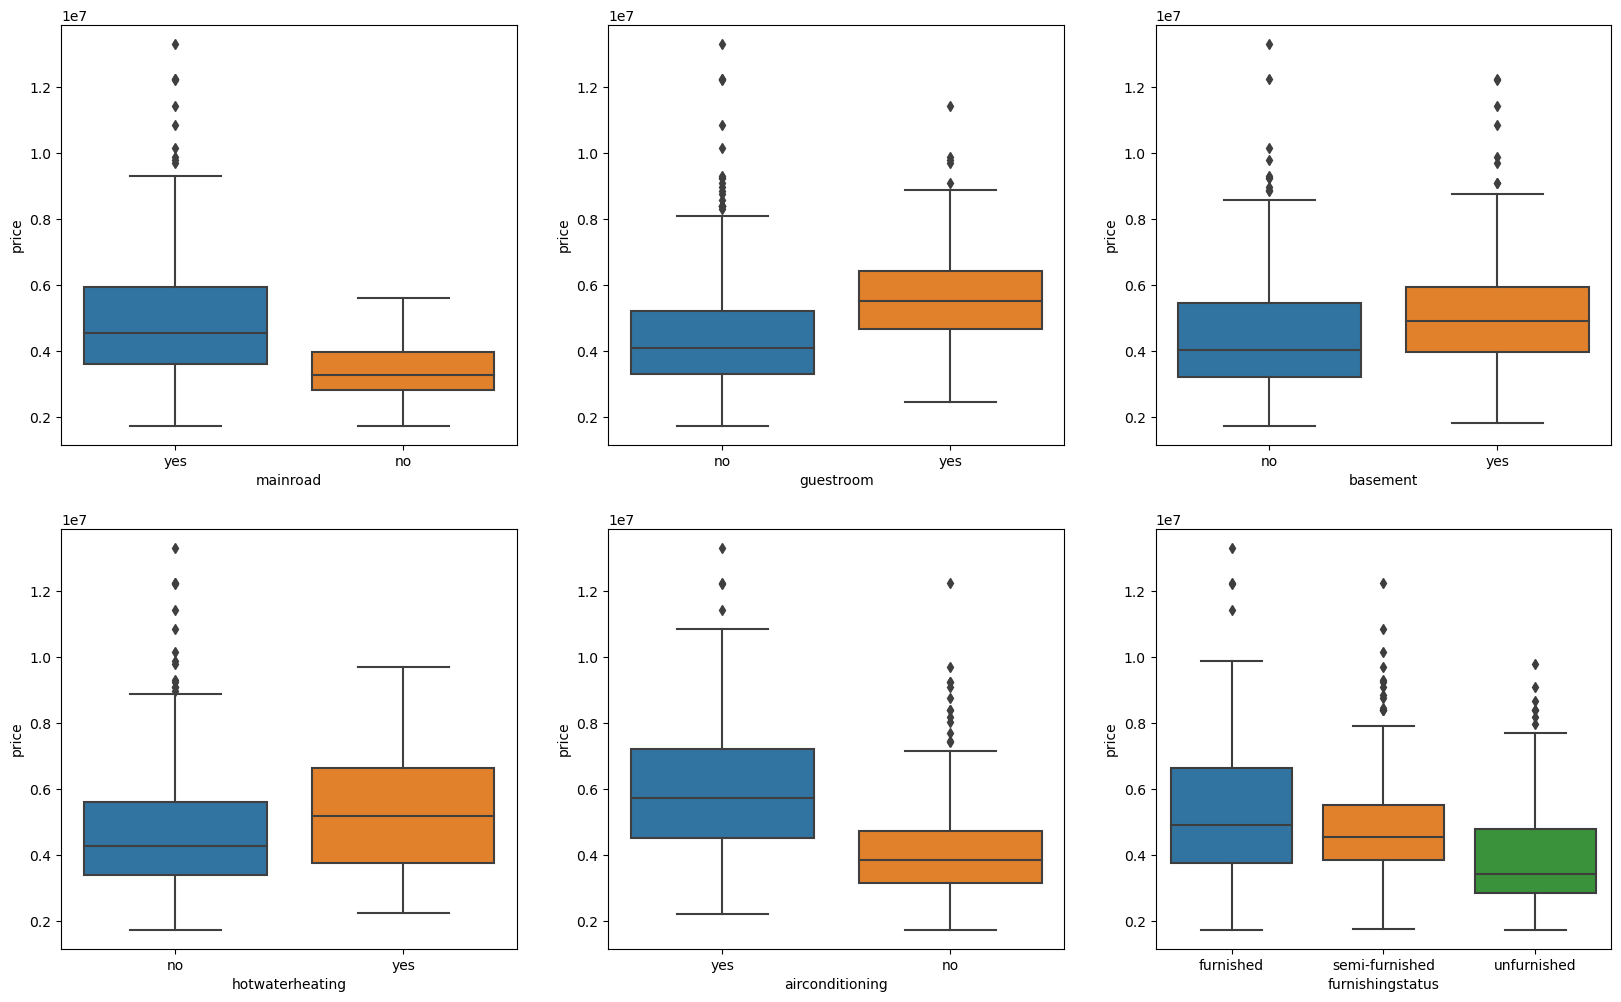

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

## Step 3: Data Preparation

#categorical to numerical

In [15]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [16]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

In [17]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [18]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [19]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [20]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [21]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [22]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [23]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

RESCALING:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
35,0.548133,0.614237,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
465,0.112121,0.246843,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
138,0.345455,0.384615,0.4,0.0,0.666667,1,0,0,0,1,0.000000,0,1,0
394,0.151515,0.210103,0.4,0.0,0.000000,0,0,0,0,1,0.000000,0,0,1
253,0.239394,0.214696,0.2,0.0,0.333333,1,0,0,0,0,0.000000,1,0,0


In [29]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.255126,0.373108,0.390836,0.138814,0.263252,0.865229,0.172507,0.347709,0.048518,0.304582,0.228212,0.221024,0.428571,0.315364
std,0.155837,0.202688,0.150753,0.238809,0.277051,0.341940,0.378331,0.476886,0.215147,0.460852,0.287947,0.415497,0.495540,0.465288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.218714,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.218182,0.327210,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.502870,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


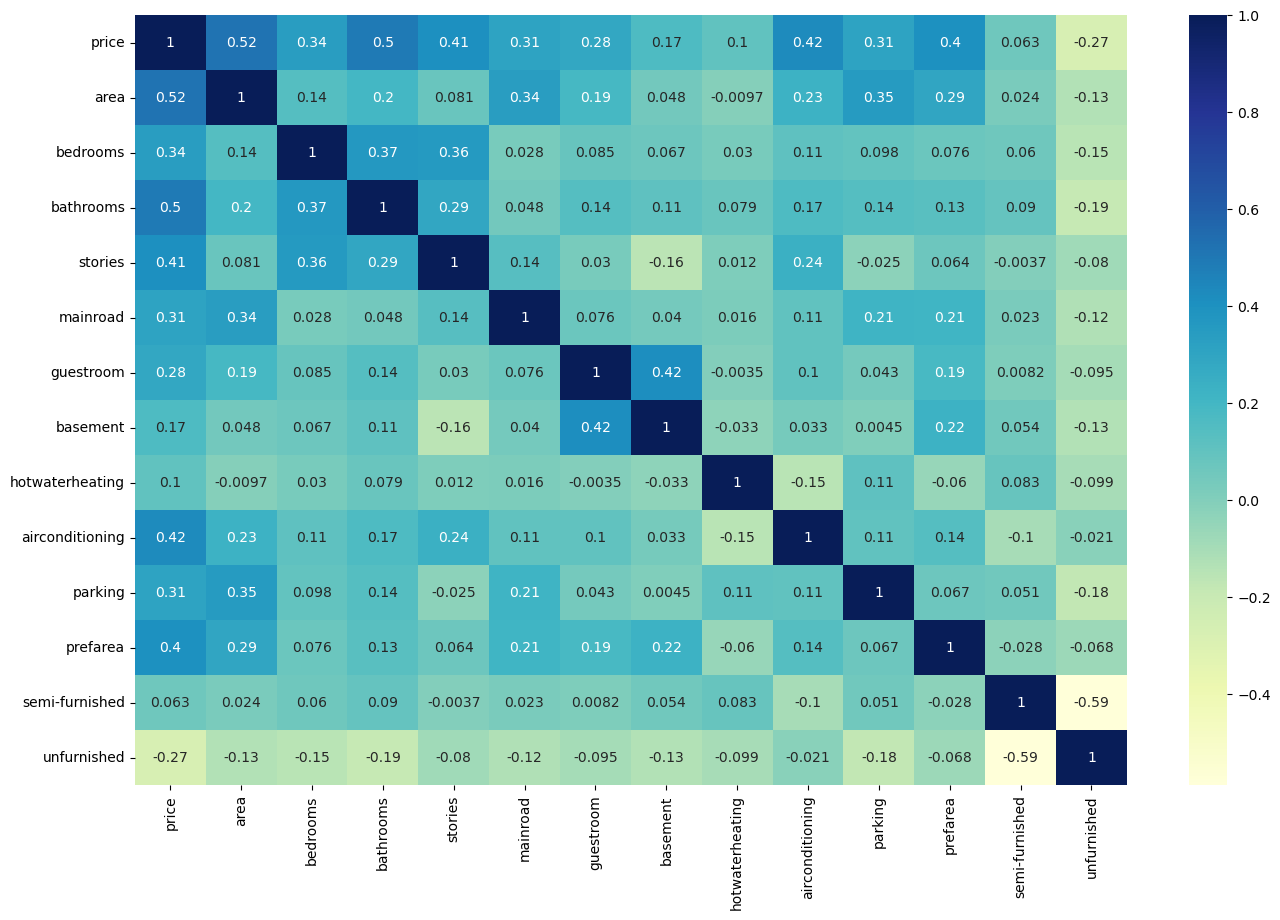

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

 `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

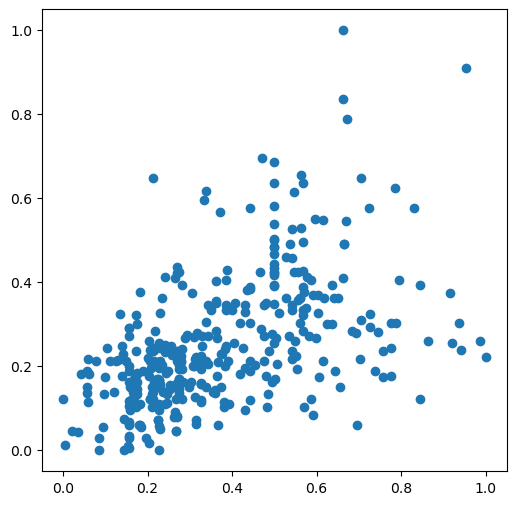

In [31]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

In [33]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [34]:
# Check the parameters obtained

lr.params

const    0.105368
area     0.401381
dtype: float64

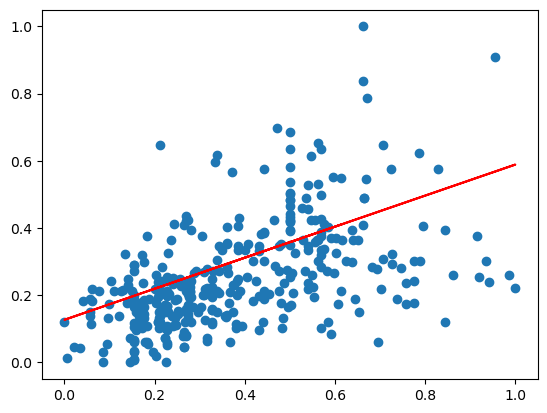

In [35]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [36]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           2.52e-27
Time:                        22:03:57   Log-Likelihood:                 222.77
No. Observations:                 371   AIC:                            -441.5
Df Residuals:                     369   BIC:                            -433.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1054      0.014      7.271      0.0

### Adding another variable

The R-squared value obtained is `0.283`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [37]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms']]

In [38]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.091773
area         0.338952
bathrooms    0.265732
dtype: float64

In [39]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           6.80e-46
Time:                        22:03:57   Log-Likelihood:                 268.59
No. Observations:                 371   AIC:                            -531.2
Df Residuals:                     368   BIC:                            -519.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0918      0.013      7.117      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.477` from `0.281`.
Let's go ahead and add another variable, `bedrooms`.

In [40]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]

In [41]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.038112
area         0.330818
bathrooms    0.230746
bedrooms     0.157489
dtype: float64

In [42]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.30e-47
Time:                        22:03:57   Log-Likelihood:                 275.24
No. Observations:                 371   AIC:                            -542.5
Df Residuals:                     367   BIC:                            -526.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0381      0.019      1.966      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [43]:
# Check all the columns of the dataframe

housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [44]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.025539
area               0.193604
bedrooms           0.062536
bathrooms          0.152372
stories            0.123781
mainroad           0.031003
guestroom          0.035243
basement           0.019767
hotwaterheating    0.078304
airconditioning    0.076063
parking            0.053092
prefarea           0.072491
semi-furnished    -0.008167
unfurnished       -0.038715
dtype: float64

In [45]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     52.38
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.73e-74
Time:                        22:03:57   Log-Likelihood:                 361.71
No. Observations:                 371   AIC:                            -695.4
Df Residuals:                     357   BIC:                            -640.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0255      0.022     

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.03
4,mainroad,6.78
0,area,5.98
3,stories,2.59
11,semi-furnished,2.29
6,basement,2.01
9,parking,1.99
12,unfurnished,1.84
2,bathrooms,1.71
8,airconditioning,1.68


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [48]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('semi-furnished', 1,)

In [49]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     56.79
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           2.78e-75
Time:                        22:03:57   Log-Likelihood:                 361.48
No. Observations:                 371   AIC:                            -697.0
Df Residuals:                     358   BIC:                            -646.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0195      0.020     

In [51]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.49
4,mainroad,6.45
0,area,5.93
3,stories,2.58
6,basement,2.00
9,parking,1.99
2,bathrooms,1.71
8,airconditioning,1.67
5,guestroom,1.53
10,prefarea,1.51


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.4`) and a high p-value (`0.086`) as well. Hence, this variable isn't of much use and should be dropped.

In [52]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('bedrooms', 1)

In [53]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     61.35
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.49e-75
Time:                        22:03:58   Log-Likelihood:                 359.94
No. Observations:                 371   AIC:                            -695.9
Df Residuals:                     359   BIC:                            -648.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0400      0.016     

In [55]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,5.67
0,area,5.58
2,stories,2.25
8,parking,1.98
5,basement,1.89
7,airconditioning,1.67
1,bathrooms,1.62
4,guestroom,1.53
9,prefarea,1.50
10,unfurnished,1.37


### Dropping the variable and updating the model

As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.06. We should drop this variable as well.

In [56]:
X = X.drop('basement', 1)

In [57]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     66.72
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           9.13e-76
Time:                        22:03:58   Log-Likelihood:                 358.23
No. Observations:                 371   AIC:                            -694.5
Df Residuals:                     360   BIC:                            -651.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0483      0.016     

In [59]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,5.58
3,mainroad,5.32
2,stories,2.18
7,parking,1.98
6,airconditioning,1.67
1,bathrooms,1.60
8,prefarea,1.46
9,unfurnished,1.37
4,guestroom,1.30
5,hotwaterheating,1.11


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

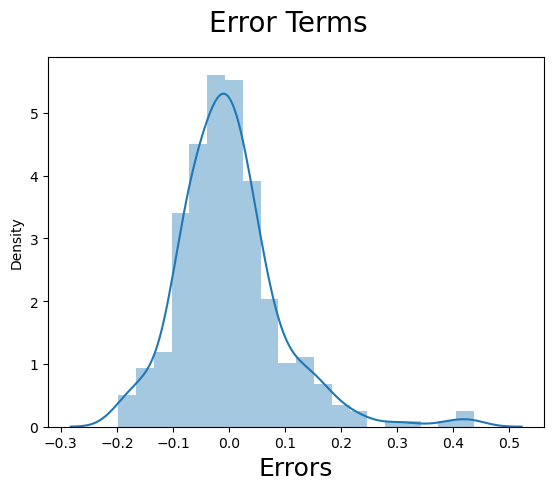

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [62]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.261889,0.392133,0.394969,0.150943,0.287212,0.830189,0.201258,0.352201,0.037736,0.345912,0.226415,0.245283,0.389937,0.371069
std,0.171336,0.220543,0.138618,0.274177,0.321472,0.376653,0.402207,0.479165,0.191159,0.477168,0.286402,0.431614,0.489277,0.484617
min,0.000000,0.029277,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.213548,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.338691,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.353939,0.543054,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,0.989552,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [66]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [67]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

In [68]:
r2_score(y_true=y_test , y_pred=y_pred_m4)

0.6965193092441351

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

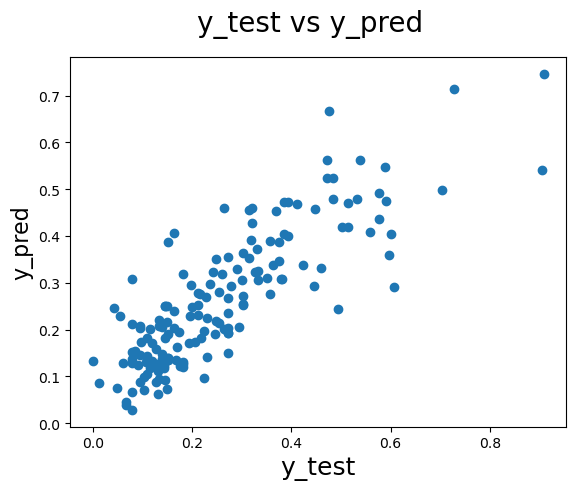

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ price = 0.1919  \times  area + 0.1660  \times  bathrooms + 0.12 \times stories + 0.03 \times mainroad + 0.04 \times guestroom + 0.076 \times hotwaterheating + 0.07 \times airconditioning + 0.05 \times parking + 0.07 \times prefarea - 0.036 \times unfurnished $
